<a href="https://colab.research.google.com/github/Pogba666/DeepLearning/blob/main/HPE_Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
# Creating 3 basic images
import numpy as np
import matplotlib.pyplot as plt
i1 = np.array([np.array([400,400]),np.array([400,400])])
i2 = np.array([np.array([400,400]),np.array([0,0])])
i3 = np.array([np.array([400,0]),np.array([400,0])])
i4 = np.array([np.array([400,0]),np.array([0,400])])
i5 = np.array([np.array([400,0]),np.array([400,400])])

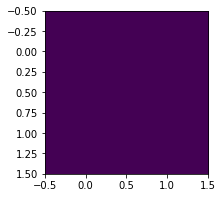

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(i1)

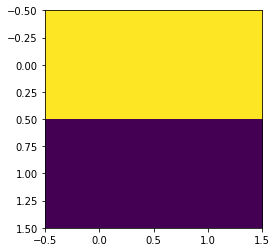

In [ ]:
plt.imshow(i2)

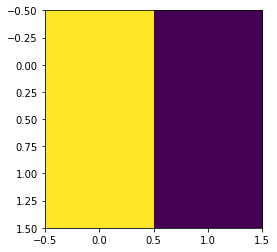

In [ ]:
plt.imshow(i3)

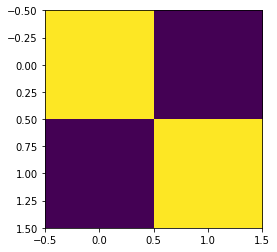

In [ ]:
plt.imshow(i4)

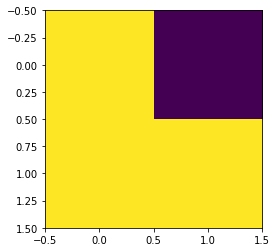

In [ ]:
plt.imshow(i5)

In [ ]:
# Kernel filters horizontal and vertical
k_h = np.array([np.array([2,2]),np.array([-2,-2])])
k_v = np.array([np.array([2,-2]),np.array([2,-2])])
def applykernel(img,kernel):
    return np.sum(np.multiply(img,kernel))

# Lambda function to detect edge
edgeDetected = lambda val: 'Edge Detected' if val>0 else 'No Edge Detected'

# Filters for detecting diagonals
k_d1 = np.array([np.array([2,-2]),np.array([-2,2])])
k_d2 = np.array([np.array([-2,2]),np.array([2,-2])])

# Lambda function to detect diagonal edge
diagEdgeDetected = lambda val: 'Diagonal Edge Detected' if val>0 else 'No Diagonal Edge Detected'

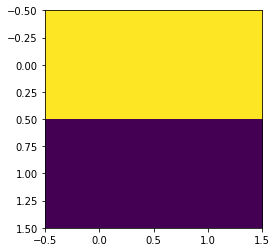

In [ ]:
plt.imshow(k_h)

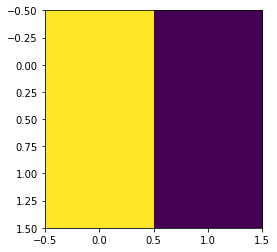

In [ ]:
plt.imshow(k_v)

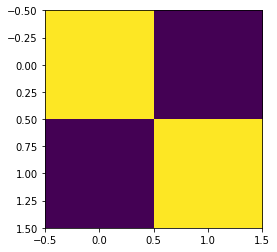

In [ ]:
plt.imshow(k_d1)

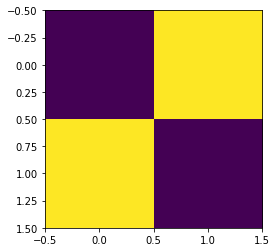

In [ ]:
plt.imshow(k_d2)

In [ ]:
# Detecting edge for horizontal and vertical filters
for i in [i1, i2, i3, i4]:
    print('Top Horizontal : ' + edgeDetected(applykernel(i, k_h)))
    print('Right Vertical     : ' + edgeDetected(applykernel(i, k_v)))
    print('Positive Diagonal : ' + diagEdgeDetected(applykernel(i, k_d1)))
    print('Negative Diagonal : ' + diagEdgeDetected(applykernel(i, k_d2)))
    print('******')
    print('******')

Top Horizontal : No Edge Detected
Right Vertical     : No Edge Detected
Positive Diagonal : No Diagonal Edge Detected
Negative Diagonal : No Diagonal Edge Detected
******
******
Top Horizontal : Edge Detected
Right Vertical     : No Edge Detected
Positive Diagonal : No Diagonal Edge Detected
Negative Diagonal : No Diagonal Edge Detected
******
******
Top Horizontal : No Edge Detected
Right Vertical     : Edge Detected
Positive Diagonal : No Diagonal Edge Detected
Negative Diagonal : No Diagonal Edge Detected
******
******
Top Horizontal : No Edge Detected
Right Vertical     : No Edge Detected
Positive Diagonal : Diagonal Edge Detected
Negative Diagonal : No Diagonal Edge Detected
******
******


In [ ]:
!ls -l

total 24
-rw-r--r-- 1 root root 19264 Dec 26 10:55 001.jpg
drwxr-xr-x 1 root root  4096 Dec 21 17:29 sample_data


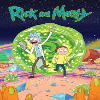

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
data = cv2.imread('001.jpg')
data = cv2.resize(data, (100,100))
cv2_imshow(data)

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.applications.vgg16 import VGG16

model = VGG16()
kernels, biases = model.layers[1].get_weights()
fmin, fmax = kernels.min(), kernels.max()
filters_norm = (kernels - fmin) / (fmax - fmin)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Using TensorFlow backend.


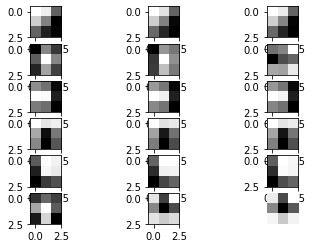

In [ ]:
n_filters, ix = 6, 1
for i in range(n_filters):
    f = kernels[:,:,:,i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:,:,j], cmap = 'gray')
        ix += 1

plt.axis('off')
plt.show()

In [ ]:
for layer in model.layers:
    try:
        kernels, biases = layer.get_weights()
        print(layer.name)
        print(len(kernels[0][0]))
    except:
        continue

block1_conv1
3
block1_conv2
64
block2_conv1
64
block2_conv2
128
block3_conv1
128
block3_conv2
256
block3_conv3
256
block4_conv1
256
block4_conv2
512
block4_conv3
512
block5_conv1
512
block5_conv2
512
block5_conv3
512
fc1
fc2
predictions


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('001.jpg', target_size=(224,224))
img = img_to_array(img)
img.shape

(224, 224, 3)

In [ ]:
img[0][0]

array([29., 30., 50.], dtype=float32)

In [ ]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input
img = expand_dims(img, axis=0)
model = Model(inputs = model.inputs, outputs = model.layers[1].output)
# 1 more dimension in the beginning of my image. (R,G,B) -> (SAMPLE_ID, R, G,B)
print(img.shape)
img = preprocess_input(img)
featureMaps = model.predict(img)
print(featureMaps.shape)

(1, 224, 224, 3)

(1, 224, 224, 64)


In [ ]:
featureMaps.shape

(1, 224, 224, 64)

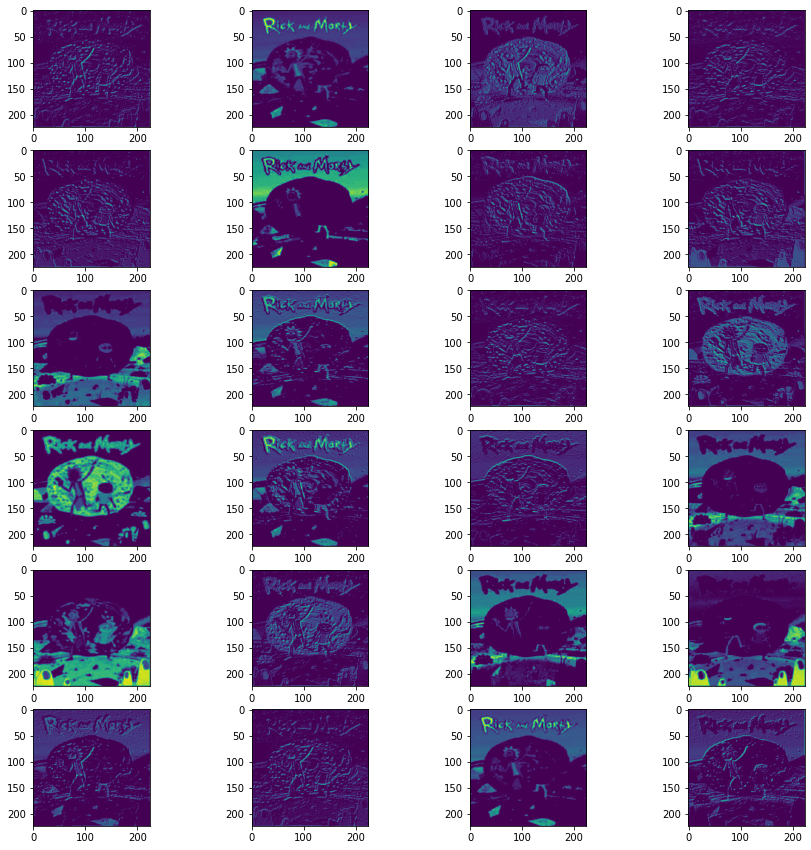

In [ ]:
index = 1
count = 0
plt.figure(figsize=(15,15))
for x in range(24):
  ax = plt.subplot(6,4,index)
  plt.imshow(featureMaps[0, :, :, index-1])
  index = index + 1
  count = count + 1
plt.show()